# Lí thuyết

ANOVA - ANallysis Of VAriance 
- Kiểm định ANOVA được sử dụng để so sánh giá trị trung bình của 2 nhóm hoặc nhiều hơn 
- Giá trị trung bình nhóm được suy ra từ việc phân tích phương sai
- ANOVA sử dụng kiểm định F (Fisher) dựa trên phương sai để xem giá trị trung bình của các nhóm có bằng nhau hay không
- Các loại kiểm định ANOVA:
    - ANOVA một chiều (one factor)
	- ANOVA hai chiều ( two factor)

Giả thuyết ANOVA
- Giả thuyết rỗng $H_0$: Các giá trị trung bình của các nhóm bằng nhau 
$$H_0: \mu_1 = \mu_2 = ... = \mu_n$$
- Giả thuyết thay thế $H_1$ hay $H_\alpha$: Có ít nhất một cặp giá trị trung bình của nhóm khác nhau
$$H_\alpha: \mu_n \neq \mu_m$$ (m, n tùy ý và m $\neq$ n)

ANOVA assumptions
- Các mẫu phải __`tuân theo phân phối chuẩn`__ ($\rightarrow$ Shapiro-Wilks test)
- Các phân phối phải có __`cùng phương sai`__ ($\rightarrow$ (Levene’s or Bartlett’s Test)
- Dữ liệu phải lấy **`độc lập`**

Cách thực hiện ANOVA test

- B1: Kiểm tra kích thước mẫu -> số lượng cá thể quan sát trong mỗi mẫu là phải như nhau
- B2: Tính Mean Square (MS) cho mỗi nhóm  ($\frac{Sum-of-Square}{level_1}$ = $\frac{SS}{d_f}$ (level_1: là hệ số tự do $d_f$ cho 1 nhóm = số nhóm - 1)
- B3: Tính sai số trung bình - Mean Square error MSE ($\frac{SSE}{df-of-residuals}$)
- B4: Tính giá trị F ($\frac{MS-of-group}{MSE}$)

### Thực hiện ANOVA test với Python

In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

B1: Nhập dữ liệu, kiểm tra trong mỗi nhóm số lượng cá thể có bằng nhau hay không

In [2]:
data = pd.read_csv("data.csv")
data

,Screen Size,Weight,Brightness
0,10.006692,29.313384,19.825988
1,10.081624,29.463248,19.993238
2,10.072873,29.445746,19.973641
3,9.954496,29.208992,19.710221
4,9.994093,29.288185,19.797988
...,...,...,...
995,10.034021,29.368042,19.886842
996,10.068130,29.436260,19.963027
997,9.969032,29.238063,19.742399
998,9.939579,29.179159,19.677249


## Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

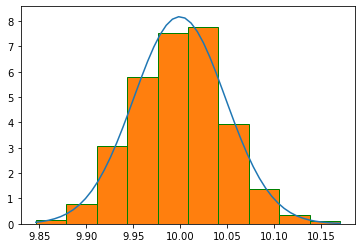

In [4]:
# Sử dụng histogram
import matplotlib.pyplot as plt
from scipy import stats
data1 = data[["Screen Size"]]
mean = np.mean(data1)
# ddof=1 :: hiệu chỉnh
std = np.std(data1, ddof=1)
domain = np.linspace(np.min(data1), np.max(data1))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data1, edgecolor='green', density=True)
plt.show()

### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [5]:
# Sử dụng Shapiro-Wilk test 
from scipy.stats import shapiro
stat1, p1 = shapiro(data1)
print('stat=%.3f, p=%.3f' % (stat1, p1))
if p1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.999, p=0.731
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


## Sử dụng kiểm định D’Agostino’s K^2

In [6]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat2, p2 = normaltest(data[["Weight"]])
print('stat=%.3f, p=%.3f' % (stat2, p2))
if p2 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.112, p=0.946
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


In [8]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
stat3, p3 = normaltest(data[["Brightness"]])
print('stat=%.3f, p=%.3f' % (stat3, p3))
if p3 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.261, p=0.878
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


__Ngoài ra còn có các kiểm định để kiểm tra phân phối chuẩn__
- Kiểm định Anderson-Darling
- Kolmogorov Smirnov test
- Lilliefors test

## Kiểm định tính thuần nhất phương sai (homogeneity of variance)

## Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [9]:
from scipy.stats import bartlett
stat_bartlett, p_bartlett = bartlett(data["Screen Size"], data["Weight"], data["Brightness"])
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0: Các feature đồng nhất về phương sai')
else:
    print('Các feature không đồng nhất về phương sai')

609.1564291909685 5.2888602698504484e-133
Các feature không đồng nhất về phương sai


In [10]:
from scipy.stats import levene
stat_levene, p_levene = levene(data["Screen Size"], data["Weight"], data["Brightness"])
print(p_levene)
if p_levene > 0.05:
    print('Không thể bác bỏ giả thiết H0: Các feature đồng nhất về phương sai')
else:
    print('Các feature không đồng nhất về phương sai')

2.0437017282021978e-94
Các feature không đồng nhất về phương sai


In [11]:
a, b, c = [np.var(x, ddof=1) for x in [data[["Screen Size"]], data[["Weight"]], data[["Brightness"]]]]
a, b, c

(Screen Size    0.002382
 dtype: float64,
 Weight    0.009529
 dtype: float64,
 Brightness    0.011764
 dtype: float64)

Phương sai của 3 nhóm dữ liệu:

||Screen Size|Weight|Brightness|
|---|---|---|---|
|Variance|0.002382|0.0095|0.011764|

$\Rightarrow$ Nhận thấy rằng Var của nhóm Brightness lớn hơn nhiều so 2 nhóm còn lại 

$\Rightarrow$ Không thể thực hiện kiểm đinh ANOVA

In [12]:
data1 = pd.read_excel("owan02.xls")
data1

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,2569,2074,2505,2838,1532
1,2928,2885,2315,2351,2552
2,2865,3378,2667,3001,3083
3,3844,3906,2390,2439,2330
4,3027,2782,3021,2199,2079
5,2336,3018,3085,3318,3366
6,3211,3383,3308,3601,2416
7,3037,3447,3231,3291,3100


### Kiểm định phân phối chuẩn 

$H_0$: Các feature tuân theo phân phối chuẩn 

$H_\alpha$: Các feature không tuân theo phân phối chuẩn

In [13]:
X1 = data1["X1"]
X2 = data1["X2"]
X3 = data1["X3"]
X4 = data1["X4"]
X5 = data1["X5"]

In [14]:
# Sử dụng Shapiro-Wilk test kiểm định X1
stat_X1, p_X1 = shapiro(X1)
print('stat=%.3f, p=%.3f' % (stat_X1, p_X1))
if p_X1 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.943, p=0.645
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


In [15]:
# X2
stat_X2, p_X2 = shapiro(X2)
print('stat=%.3f, p=%.3f' % (stat_X2, p_X2))
if p_X2 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.954, p=0.747
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


In [16]:
# X3
stat_X3, p_X3 = shapiro(X3)
print('stat=%.3f, p=%.3f' % (stat_X3, p_X3))
if p_X3 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.905, p=0.317
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


In [17]:
# X4
stat_X4, p_X4 = shapiro(X4)
print('stat=%.3f, p=%.3f' % (stat_X4, p_X4))
if p_X4 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.939, p=0.599
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


In [18]:
# X5
stat_X5, p_X5 = shapiro(X5)
print('stat=%.3f, p=%.3f' % (stat_X5, p_X5))
if p_X5 > 0.05:
    print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
else:
    print('Dữ liệu không tuân theo luật phân phối chuẩn')

stat=0.959, p=0.803
Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn


### Kiểm định tính đồng nhất các phương sai

$H_0$: Các feature có phương sai đồng nhất 

$H_\alpha$: Các feature không đồng nhất phương sai

In [19]:
# Sử dụng Bartlett test

stat_bartlett, p_bartlett = bartlett(X1, X2, X3, X4, X5)
print(stat_bartlett, p_bartlett)
if p_bartlett > 0.05:
    print('Không thể bác bỏ giả thiết H0: Các feature đồng nhất về phương sai')
else:
    print('Các feature không đồng nhất về phương sai')

1.505379741017298 0.825688088344803
Không thể bác bỏ giả thiết H0: Các feature đồng nhất về phương sai


Tính trung bình các nhóm:

$\overline{\rm X_1} = \frac{1}{n}\sum_{}{}X_{1i} = \frac{1}{8}\sum_{}{}X_{1i}$  

$\overline{\rm X_2} = \frac{1}{n}\sum_{}{}X_{2i} = \frac{1}{8}\sum_{}{}X_{2i}$

$\overline{\rm X_3} = \frac{1}{n}\sum_{}{}X_{3i} = \frac{1}{8}\sum_{}{}X_{3i}$

$\overline{\rm X_4} = \frac{1}{n}\sum_{}{}X_{4i} = \frac{1}{8}\sum_{}{}X_{4i}$

$\overline{\rm X_5} = \frac{1}{n}\sum_{}{}X_{5i} = \frac{1}{8}\sum_{}{}X_{5i}$

$\overline{\rm X} = \frac{\sum_{}{}X_{m}}{k} = \frac{\overline{\rm X_1}+\overline{\rm X_2}+\overline{\rm X_3}+\overline{\rm X_4}+\overline{\rm X_5}}{5}$

Với:
- n: số lượng cá thể trong mỗi nhóm (= 8)
- k: số lượng nhóm trong quần thể quan sát (= 5)

In [20]:
# Tính trung bình các nhóm
mean_x1 = X1.mean()
mean_x2 = X2.mean()
mean_x3 = X3.mean()
mean_x4 = X4.mean()
mean_x5 = X5.mean()
mean_x1, mean_x2, mean_x3, mean_x4, mean_x5 

(2977.125, 3109.125, 2815.25, 2879.75, 2557.25)

In [21]:
# Trung bình quần thể
mean_total = (mean_x1+mean_x2+mean_x3+mean_x4+mean_x5)/5
mean_total

2867.7

Compute the ‘between-group’ sum of squared differences ($SS_B$)

- $SS_B = n(\overline{\rm X} - \overline{\rm X_1})^2 + n(\overline{\rm X} - \overline{\rm X_2})^2 + n(\overline{\rm X} - \overline{\rm X_3})^2 + n(\overline{\rm X} - \overline{\rm X_4})^2 + n(\overline{\rm X} - \overline{\rm X_5})^2$

Compute the between-group mean square value ($MS_B$)
- $MS_B = \frac{SS_B}{d_f}$
- $d_f$: bậc tự do = (k -1 = 4)

Calculate the “within-group” sum of squares ($SS_W$)
- $SS_W = \displaystyle \sum_{i}^{}\sum_{j}^{}(\overline{\rm X_{ij}} - \overline{\rm X_{i}})$

Compute the within-group mean square value ($MS_W$)
- $MS_W = \frac{SS_W}{d_f}$
- $d_f = k(n-1) = 35$

Compute the F-score:
- $F = \frac{MS_B}{MS_W}$

In [25]:
n = 8
k = 5
SSb = n*((mean_total - mean_x1)**2 + (mean_total - mean_x2)**2 + (mean_total - mean_x3)**2
        + (mean_total - mean_x4)**2 + (mean_total - mean_x5)**2)

print('Between-groups Sum of Squared Differences: {}'.format(SSb))
print("-"*50)


MSb = SSb/(k-1)
print('Between-group Mean Square Value: {}'.format(MSb))
print("-"*50)

Between-groups Sum of Squared Differences: 1356282.15
--------------------------------------------------
Between-group Mean Square Value: 339070.5375
--------------------------------------------------


In [42]:
# Tính sai số mỗi nhóm 
eer_x1 = X1-mean_x1
eer_x2 = X2-mean_x2
eer_x3 = X3-mean_x3
eer_x4 = X4-mean_x4
eer_x5 = X4-mean_x5

def sum_eer_square(a):
    result1 = []
    result2 = 0
    for x in a:
        result1.append(x**2)
    for x in result1:
        result2 = result2 + x
    return result2

SSw = (sum_eer_square(eer_x1) + sum_eer_square(eer_x2) + sum_eer_square(eer_x3) 
       + sum_eer_square(eer_x4) + sum_eer_square(eer_x5))

MSw = SSw/(k*(n-1))
print("Within-group sum of squares: {}".format(SSw))
print("-"*50)
print("Within-group mean square value: {}".format(MSw))
print("-"*50)
print("F value: {}".format(MSb/MSw))

Within-group sum of squares: 9120642.25
--------------------------------------------------
Within-group mean square value: 260589.7785714286
--------------------------------------------------
F value: 1.3011659143302106


## Kiểm tra lại bằng module Python

In [24]:
# Kiểm tra lại bằng module Scipy
import scipy.stats as stats
stats.f_oneway(X1, X2, X3, X4, X5)

F_onewayResult(statistic=1.3142198672637213, pvalue=0.28382583646160114)

In [30]:
import pandas as pd
# load data file
df = pd.read_excel("owan02.xls")
df

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5
0,2569,2074,2505,2838,1532
1,2928,2885,2315,2351,2552
2,2865,3378,2667,3001,3083
3,3844,3906,2390,2439,2330
4,3027,2782,3021,2199,2079
5,2336,3018,3085,3318,3366
6,3211,3383,3308,3601,2416
7,3037,3447,3231,3291,3100


In [32]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['X1', 'X2', 'X3', 'X4', 'X5' ])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,X1,2569
1,1,X1,2928
2,2,X1,2865
3,3,X1,3844
4,4,X1,3027
5,5,X1,2336
6,6,X1,3211
7,7,X1,3037
8,0,X2,2074
9,1,X2,2885


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1356282.15,4.0,1.31422,0.283826
Residual,9030048.25,35.0,NaN,NaN
